In [3]:
import anndata
import numpy as np
import scanpy as sc
import pandas as pd
import os
import time
import argparse
import random
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format='retina'

In [4]:
model_name_all = ['cellplm','scMulan','geneformer','scgpt','scimilarity','uce','scfoundation','scvi','linearscvi','pca','cellblast','cellfishing']

In [5]:
fms = ['cellplm','scMulan','geneformer','scgpt','scimilarity','uce','scfoundation']

In [6]:
path = "/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/retrieval_clean_codebase/DEG_analysis/output/predicted_deg"
adata = anndata.read("/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/pancrea_data_embedding/adata_pbmc_benchmark.h5ad")
overlap_map = np.zeros((len(model_name_all), len(model_name_all)))
all_celltype = np.array(adata.obs['CellType'])
all_genes = adata.var['gene_name'].tolist()

/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
all_celltype.shape

(31021,)

In [8]:
for k in [100]:
    for method in [1]:
        
        index = pd.read_csv("/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/retrieval_clean_codebase/DEG_analysis/output/platform_sample/" + str(method) + "_index.csv")
        query_index = list(index['Query'])
        overlap_dict = {}
        deg_dict = {}
        ct_dict = {}
        for item in range(len(index)):
            performance_dict = dict()
            deg_dict_sub = dict()
            all_cell_type_item = all_celltype[query_index[item]]
            marker = pd.read_csv("../marker_annotations/" + all_cell_type_item + " marker.csv",sep='\t').values[:,2]
            deg_dict_sub['gt']=set(marker)
            for model in model_name_all:
                top_genes_scores_pvals = pd.read_csv(path + "/" + model + "_" + str(method) + "_method_l2_norm/de_tests/" + str(query_index[item]) + ".csv")
                top_genes_scores_pvals = np.array(top_genes_scores_pvals['genes'][0:k])
                # performance_dict[item].append(len(set(top_genes_scores_pvals).intersection(set(marker))) / len(set(marker)))
                performance_dict[model] = set(top_genes_scores_pvals).intersection(set(marker))
                deg_dict_sub[model] = set(top_genes_scores_pvals)
            overlap_dict[query_index[item]]=performance_dict
            deg_dict[query_index[item]]=deg_dict_sub
            ct_dict[query_index[item]]=all_cell_type_item

In [ ]:
from collections import Counter
import os 
os.makedirs("frequency",exist_ok=True)

for ct in set(all_celltype):
    method_dict = {}

    for fm in model_name_all:
        deg_index_dict = {}
        deg_list = []
        for item in overlap_dict.keys():
            if all_celltype[item]==ct:
            
                gt_set = set(deg_dict[item]['gt'])
                all_degs = deg_dict[item][fm]
                multi_method_genes = [gene for gene in all_degs if (gene in gt_set)]

                if len(multi_method_genes)>0:
                    deg_index_dict[item] = multi_method_genes
                    deg_list += multi_method_genes

        counter = Counter(deg_list)
        count_list = counter.most_common()
        count_dict = dict(count_list)
        method_dict[fm] = count_dict

    all_genes = []
    for k,v in method_dict.items():
        all_genes += list(v.keys())
    all_genes = set(all_genes)

    df_dict = {'genes':list(all_genes)}
    for k,v in method_dict.items():
        df_dict[k] = [v[i] if i in v.keys() else 0 for i in all_genes]

    df = pd.DataFrame(df_dict)

    df.to_csv(f'frequency/{ct}_prior.csv')

In [10]:
all_genes = []
for k,v in method_dict.items():
    all_genes += list(v.keys())
all_genes = set(all_genes)

df_dict = {'genes':list(all_genes)}
for k,v in method_dict.items():
    df_dict[k] = [v[i] if i in v.keys() else 0 for i in all_genes]

df = pd.DataFrame(df_dict)

In [11]:
ct_counts = dict(zip(list(np.unique(list(ct_dict.values()),return_counts=True)[0]),list(np.unique(list(ct_dict.values()),return_counts=True)[1])))

In [12]:
ct_counts

{'B cell': 49,
 'CD14+ monocyte': 24,
 'CD16+ monocyte': 2,
 'CD4+ T cell': 63,
 'Cytotoxic T cell': 40,
 'Dendritic cell': 4,
 'Megakaryocyte': 3,
 'Natural killer cell': 15}

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74558/2964945626.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = (long_df


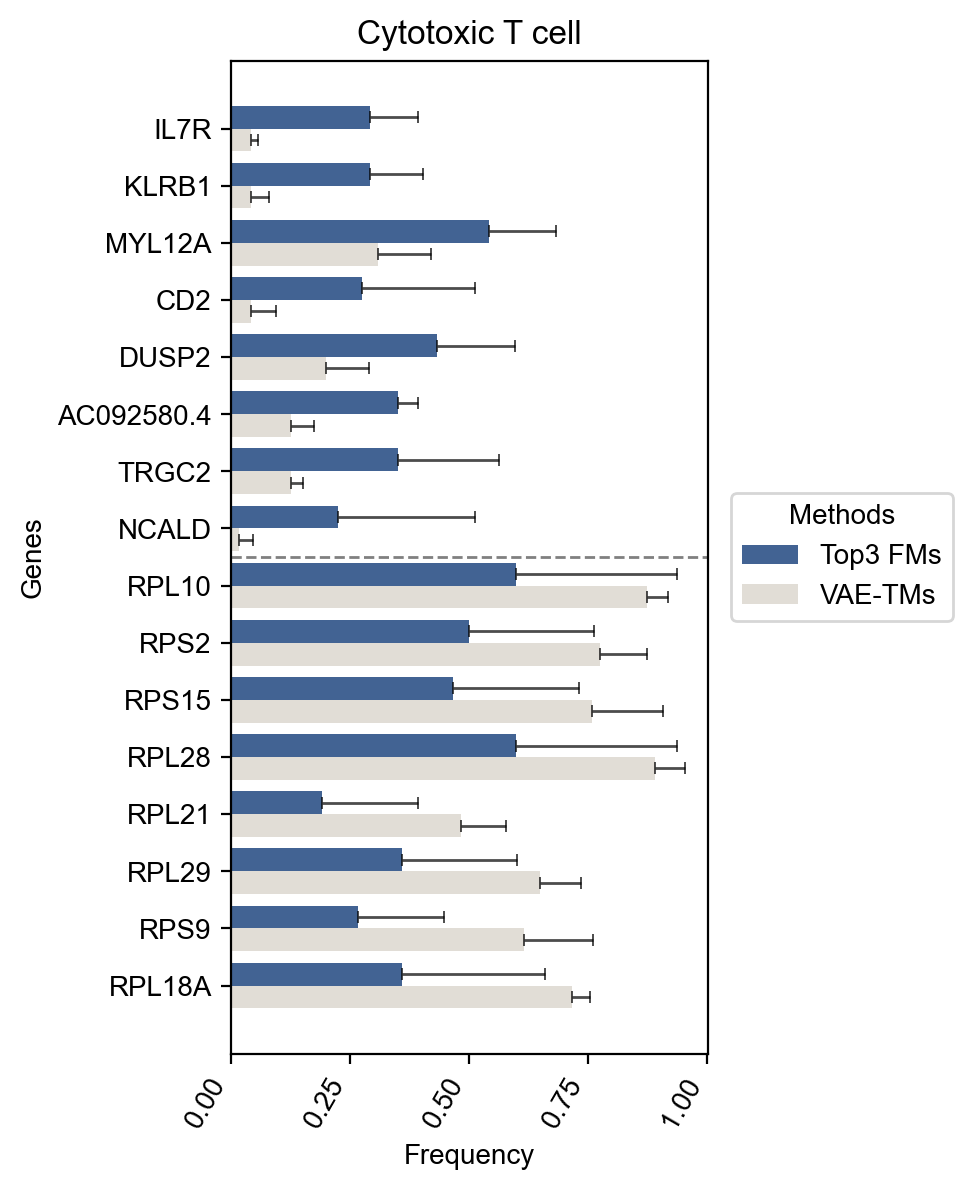

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74558/2964945626.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = (long_df


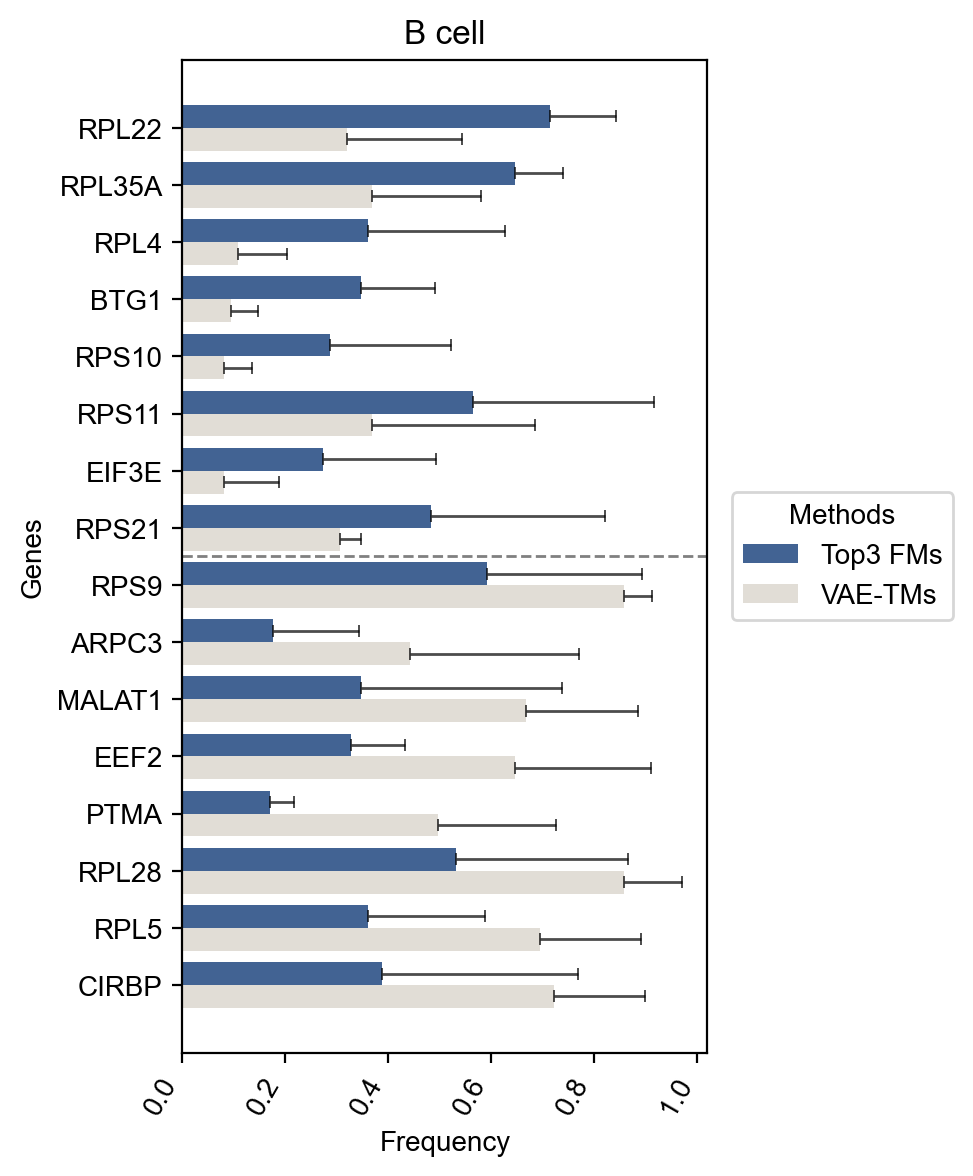

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74558/2964945626.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = (long_df


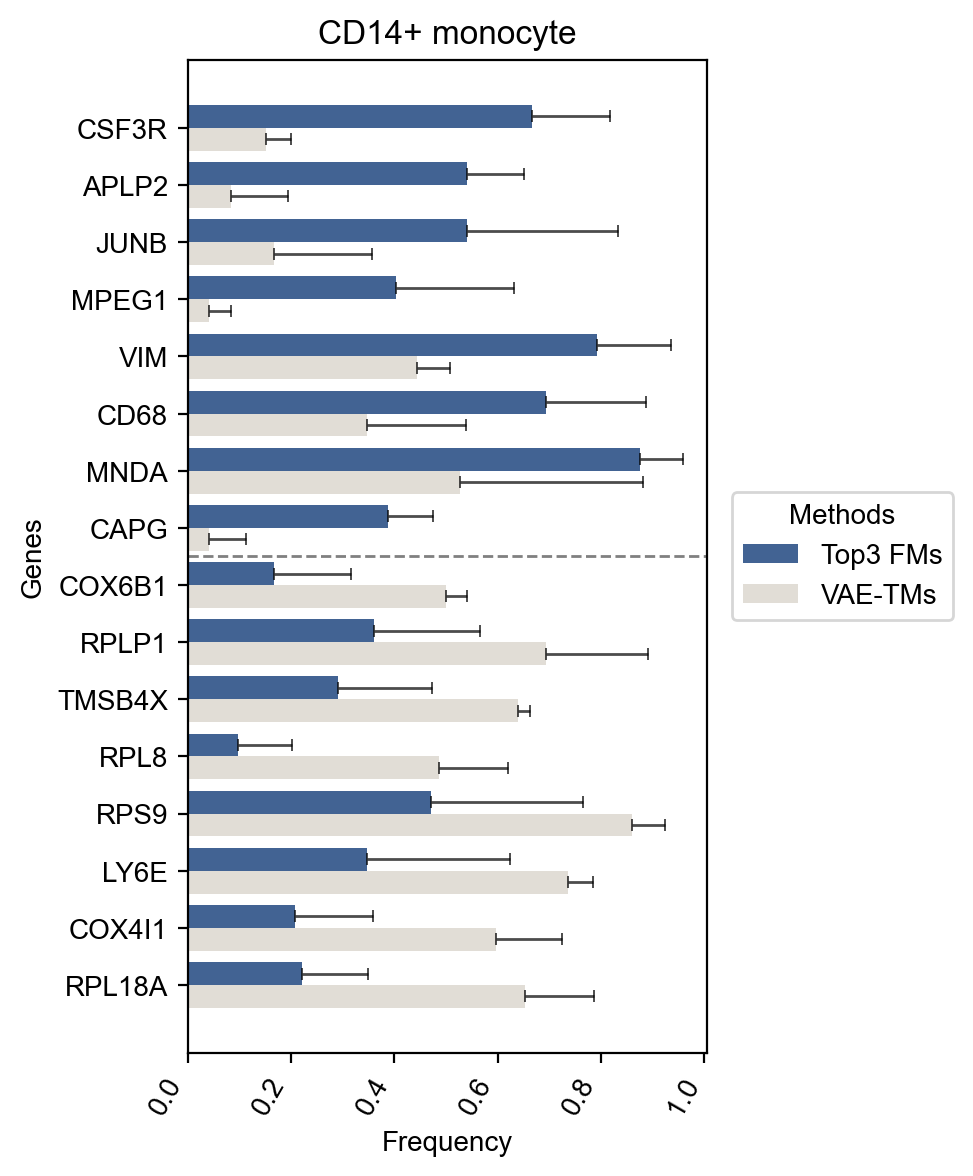

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74558/2964945626.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = (long_df


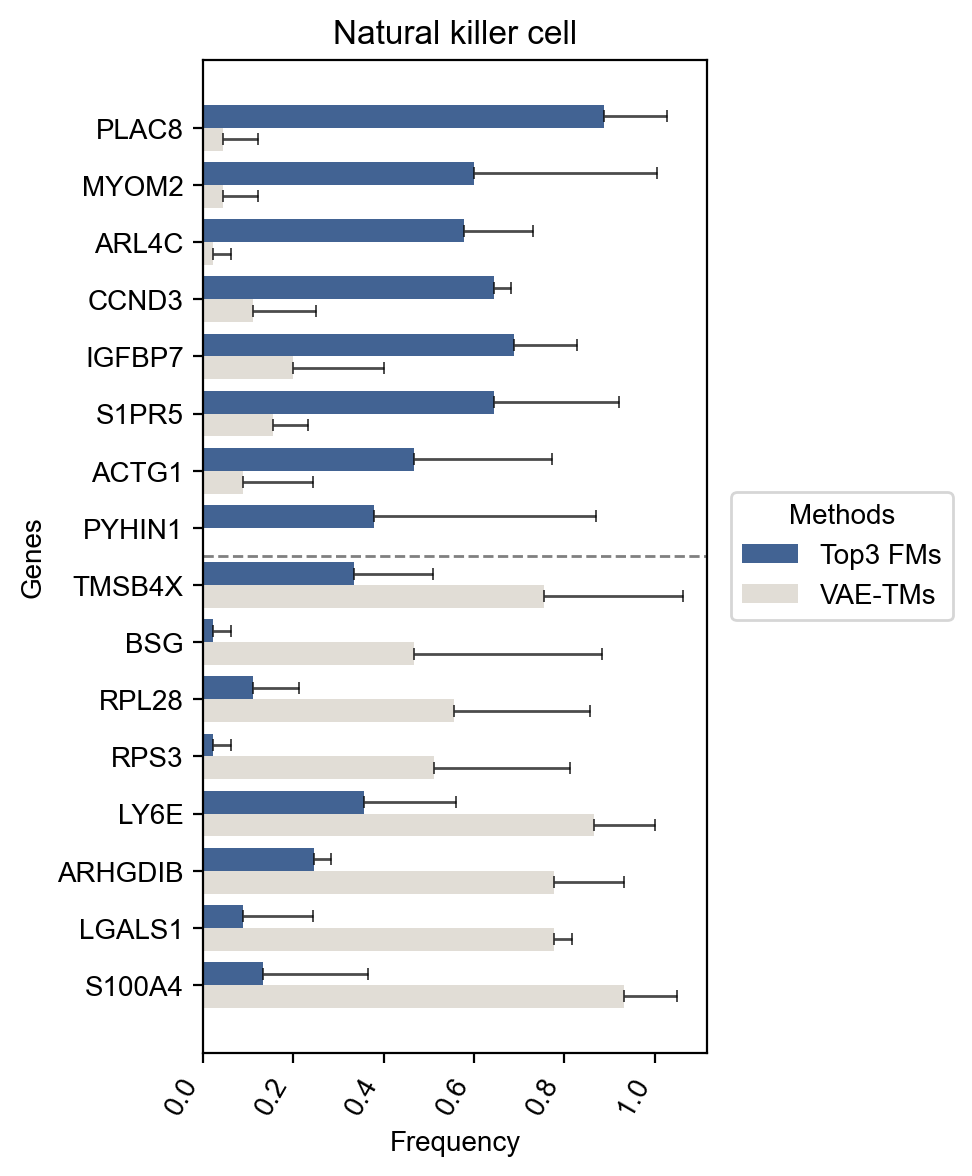

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74558/2964945626.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = (long_df


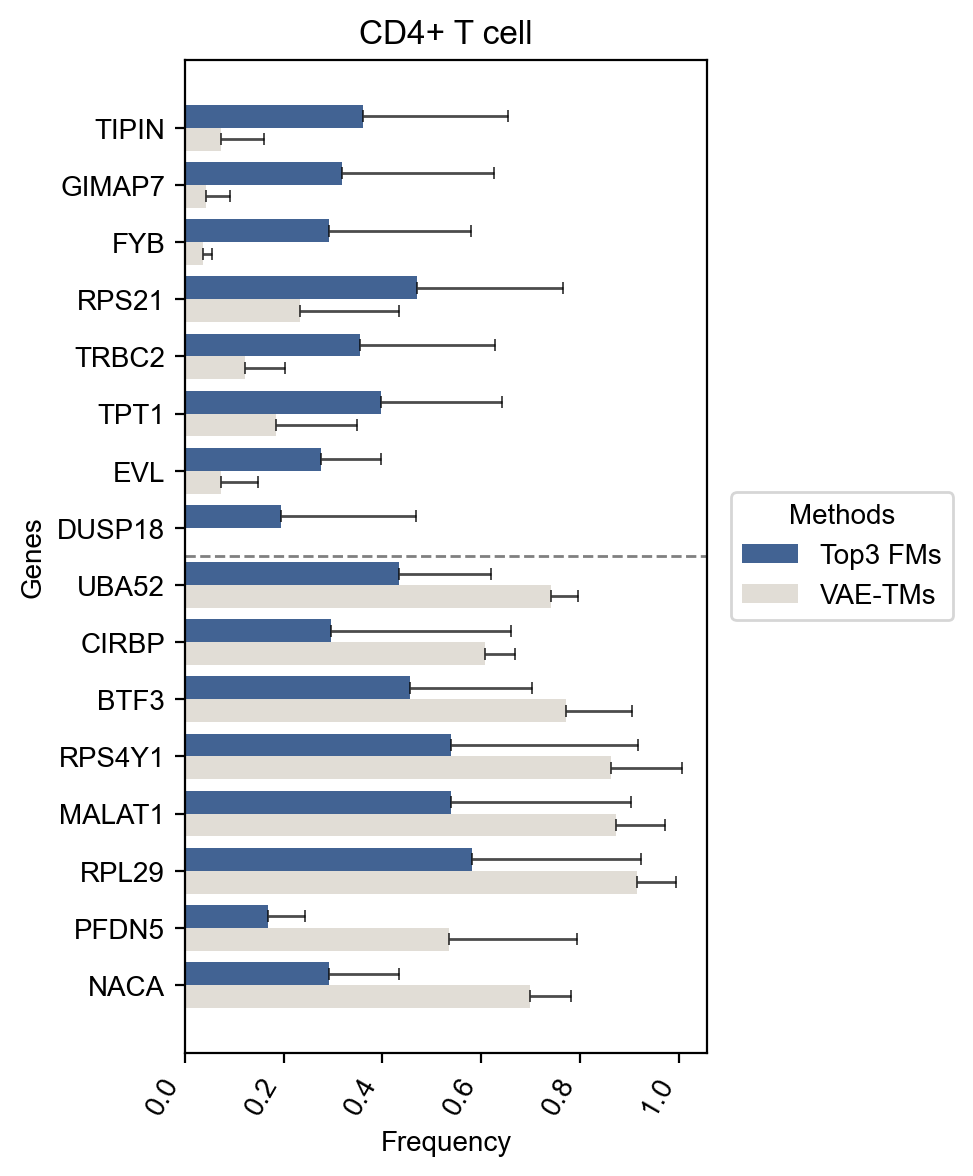

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

os.makedirs("source_data",exist_ok=True)
high_genes_dict = {}
# for cell_type in list(set(all_celltype)):
for cell_type in ['Cytotoxic T cell','B cell','CD14+ monocyte','Natural killer cell','CD4+ T cell']:
    cell_counts = ct_counts[cell_type]
    file = f'frequency/{cell_type}.csv'
    df = pd.read_csv(file)

    if 'genes' not in df.columns:
        df.columns = ['index', 'genes'] + list(df.columns[2:])

    scim_col = ['scimilarity','scMulan','uce']
    last5_cols = ['scvi','cellblast','linearscvi']
    df['TMs_avg'] = df[last5_cols].mean(axis=1)
    df['FMs_avg'] = df[scim_col].mean(axis=1)
    df['diff'] = df['FMs_avg']-df['TMs_avg']

    df_sorted = df.sort_values(by='diff', ascending=False)
    scim_genes = df_sorted.head(8)['genes'].values
    high_genes_dict[cell_type] = scim_genes
    tms_genes  = df_sorted.tail(8)['genes'].values
    target = df[df['genes'].isin(scim_genes) | df['genes'].isin(tms_genes)]
    gene_order = (
        df_sorted[df_sorted['genes'].isin(target['genes'])]
        ['genes']
        .drop_duplicates()
        .tolist()
    )
    records = []
    method_map = {
        'scimilarity': 'Top3 FMs',
        'scMulan': 'Top3 FMs',
        'uce': 'Top3 FMs',
        'scvi': 'VAE-TMs',
        'cellblast': 'VAE-TMs',
        'linearscvi': 'VAE-TMs',
    }
    for _, row in target.iterrows():
        for col, mth in method_map.items():
            records.append({
                'genes': row['genes'],
                'method': mth,
                'model': col,
                'value': row[col]/cell_counts
            })

    long_df = pd.DataFrame(records)

    long_df['genes'] = pd.Categorical(long_df['genes'], categories=gene_order, ordered=True)

    plt.figure(figsize=(5,6))
    ax = sns.barplot(
        data=long_df,
        x='value',
        y='genes',
        hue='method',
        order=gene_order,
        estimator=np.mean,
        errorbar=None,
        palette=['#3561A0', '#E3DED4']
    )

    agg_df = (long_df
            .groupby(['genes','method'], as_index=False)
            .agg(mean=('value','mean'), sd=('value','std')))

    for c, method in enumerate(agg_df['method'].unique()):
        sub = agg_df[agg_df['method'] == method].reset_index(drop=True)
        container = ax.containers[c]
        for rect, (_, r) in zip(container, sub.iterrows()):
            x = rect.get_width()
            y = rect.get_y() + rect.get_height()/2
            sd = 0.0 if pd.isna(r['sd']) else r['sd']
            ax.errorbar(
                x=x, y=y,
                xerr=[[0.0], [sd]],
                fmt='none',
                ecolor='black',
                elinewidth=1,
                capsize=2,
                capthick=0.7,
                zorder=5,
                alpha=0.7
            )
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    y_mid = (ymin + ymax) / 2.0
    ax.axhline(y=y_mid, color='grey', linestyle='--', linewidth=1)

    plt.title(f'{cell_type}')
    plt.xlabel('Frequency')
    plt.ylabel('Genes')
    plt.legend(title='Methods',loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.xticks(rotation=60, ha='right')

    plt.tight_layout()
    plt.savefig(f'{cell_type}_deg.pdf',format='pdf')
    plt.show()
    long_df.to_csv(f'source_data/{cell_type}_deg.csv')

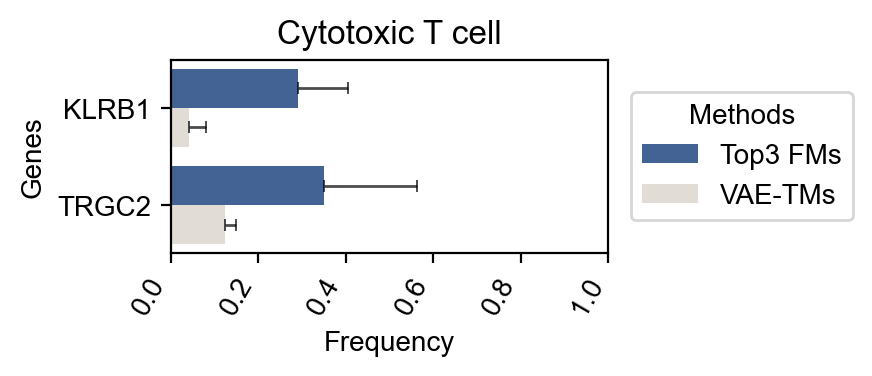

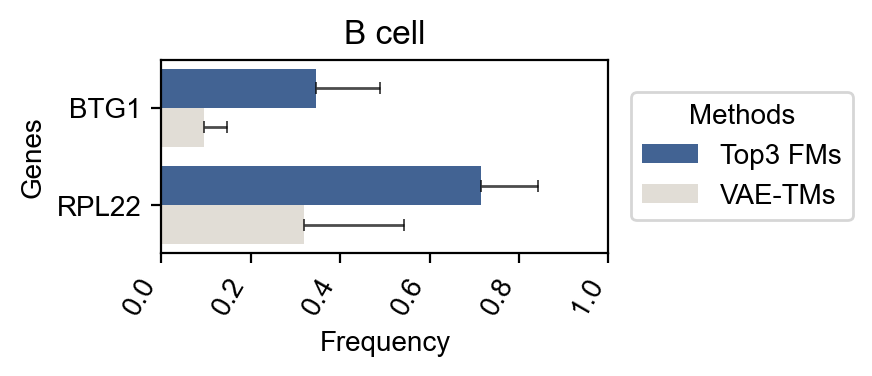

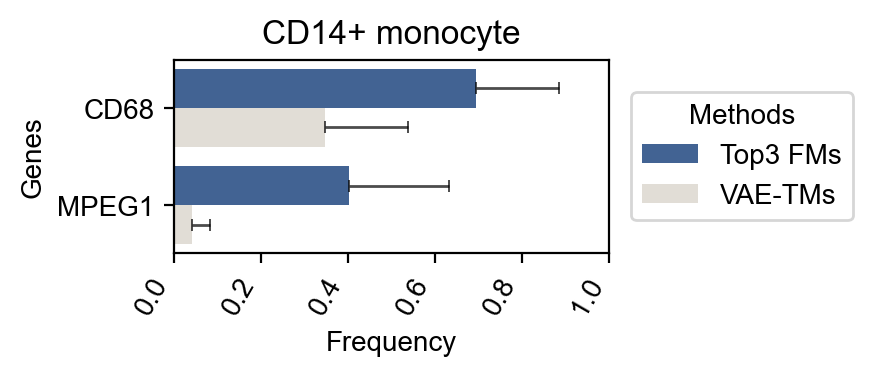

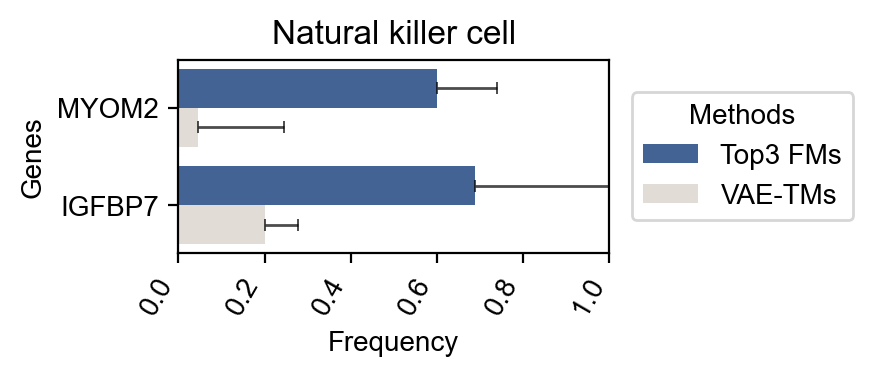

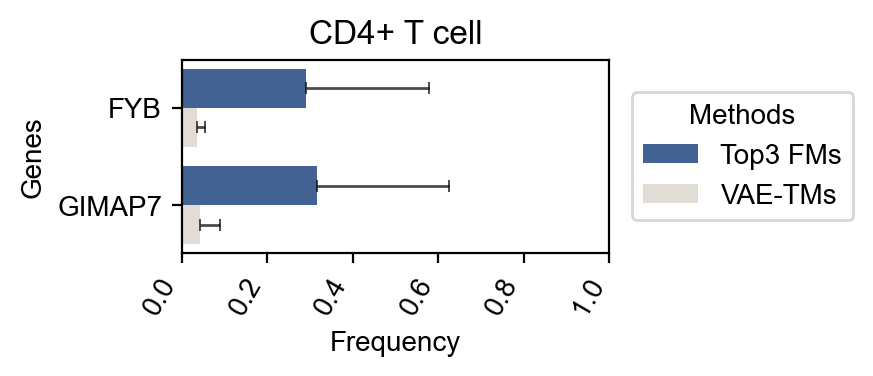

In [ ]:
subset_genes = {'Cytotoxic T cell':['TRGC2','KLRB1'],'B cell':['BTG1','RPL22'],'CD14+ monocyte':['MPEG1','CD68'],'Natural killer cell':['MYOM2','IGFBP7'],'CD4+ T cell':['GIMAP7','FYB']}
for cell_type in ['Cytotoxic T cell','B cell','CD14+ monocyte','Natural killer cell','CD4+ T cell']:
    cell_counts = ct_counts[cell_type]
    file = f'frequency/{cell_type}.csv'
    df = pd.read_csv(file)
    if 'genes' not in df.columns:
        df.columns = ['index', 'genes'] + list(df.columns[2:])

    scim_col = ['scimilarity','scMulan','uce']
    last5_cols = ['scvi','cellblast','linearscvi']
    df['TMs_avg'] = df[last5_cols].mean(axis=1)
    df['FMs_avg'] = df[scim_col].mean(axis=1)
    df['diff'] = df['FMs_avg']-df['TMs_avg']

    scim_genes = subset_genes[cell_type]
    target = df[df['genes'].isin(scim_genes)]
    
    records = []
    method_map = {
        'scimilarity': 'Top3 FMs',
        'scMulan': 'Top3 FMs',
        'uce': 'Top3 FMs',
        'scvi': 'VAE-TMs',
        'cellblast': 'VAE-TMs',
        'linearscvi': 'VAE-TMs',
    }
    for _, row in target.iterrows():
        for col, mth in method_map.items():
            records.append({
                'genes': row['genes'],
                'method': mth,
                'model': col,
                'value': row[col]/cell_counts
            })

    long_df = pd.DataFrame(records)

    plt.figure(figsize=(4.5,2))

    ax = sns.barplot(
        data=long_df,
        x='value',
        y='genes',
        hue='method',
        estimator=np.mean,
        errorbar=None,
        palette=['#3561A0', '#E3DED4']
    )

    agg_df = (long_df
            .groupby(['genes','method'], as_index=False)
            .agg(mean=('value','mean'), sd=('value','std')))

    for c, method in enumerate(agg_df['method'].unique()):
        sub = agg_df[agg_df['method'] == method].reset_index(drop=True)
        container = ax.containers[c]
        for rect, (_, r) in zip(container, sub.iterrows()):
            x = rect.get_width()
            y = rect.get_y() + rect.get_height()/2
            sd = 0.0 if pd.isna(r['sd']) else r['sd']
            ax.errorbar(
                x=x, y=y,
                xerr=[[0.0], [sd]],
                fmt='none',
                ecolor='black',
                elinewidth=1,
                capsize=2,
                capthick=0.7,
                zorder=5,
                alpha=0.7
            )
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    y_mid = (ymin + ymax) / 2.0
    # ax.axhline(y=y_mid, color='grey', linestyle='--', linewidth=1)

    plt.title(f'{cell_type}')
    plt.xlabel('Frequency')
    plt.ylabel('Genes')
    plt.legend(title='Methods',loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.xticks(rotation=60, ha='right')
    plt.xlim(0,1)
    plt.tight_layout()
    plt.savefig(f'{cell_type}_deg_sub.pdf',format='pdf')
    plt.show()



In [1]:
model_to_name = {
    'uce':'UCE',
    'scimilarity':'SCimilarity',
    'cellfishing':'CellFishing.jl',
    'scfoundation':'scFoundation',
    'scMulan':'scMuLan',
    'cellblast':'CellBlast',
    'scvi':'scVI',
    'geneformer':'Geneformer',
    'linearscvi':'LDVAE',
    'scgpt':'scGPT',
    'cellplm':'CellPLM',
    'pca':'PCA',
    'Random':'Random'
}

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74513/2092374676.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


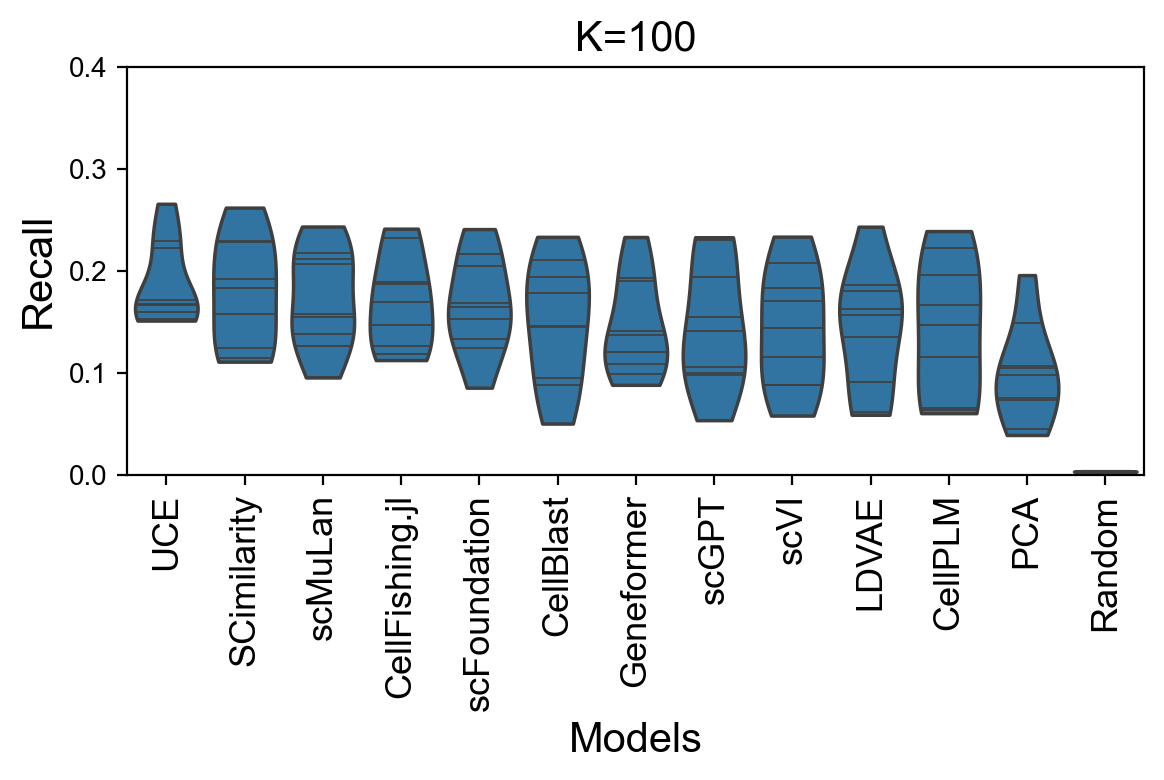

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74513/2092374676.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


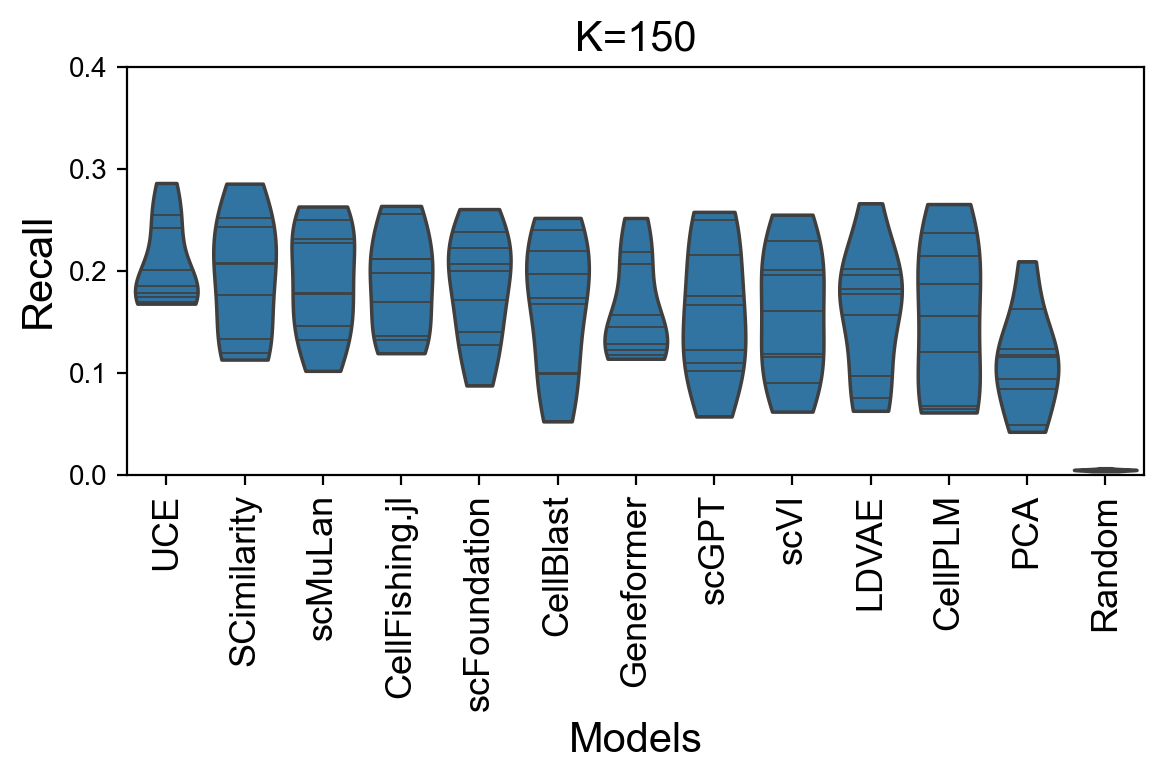

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74513/2092374676.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


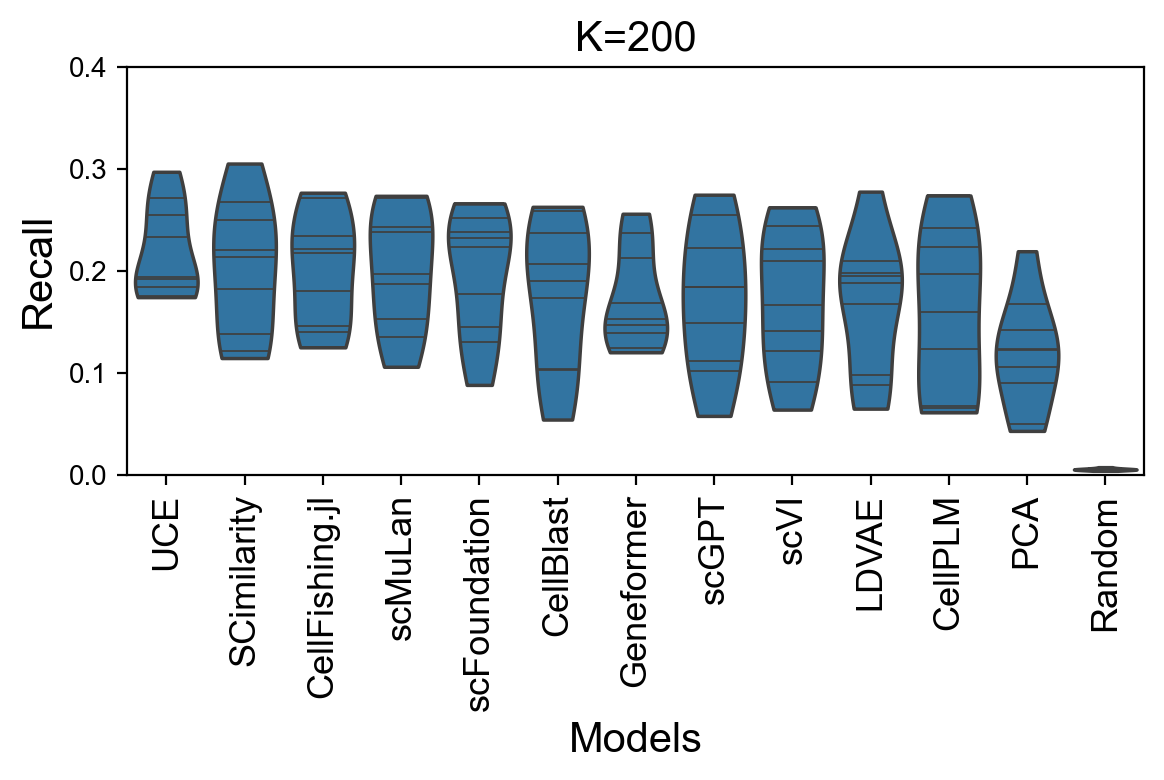

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74513/2092374676.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


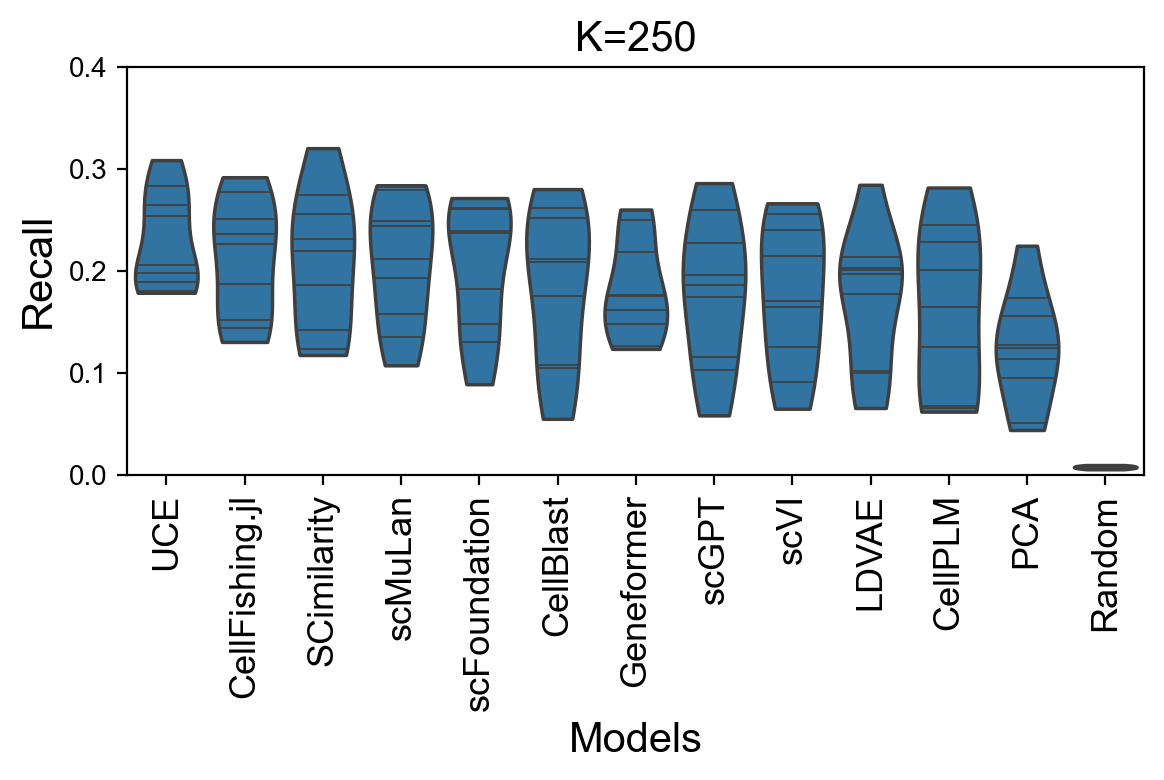

/var/folders/9z/07nkcfyj3633xn5y4v3pk5sc0000gn/T/ipykernel_74513/2092374676.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


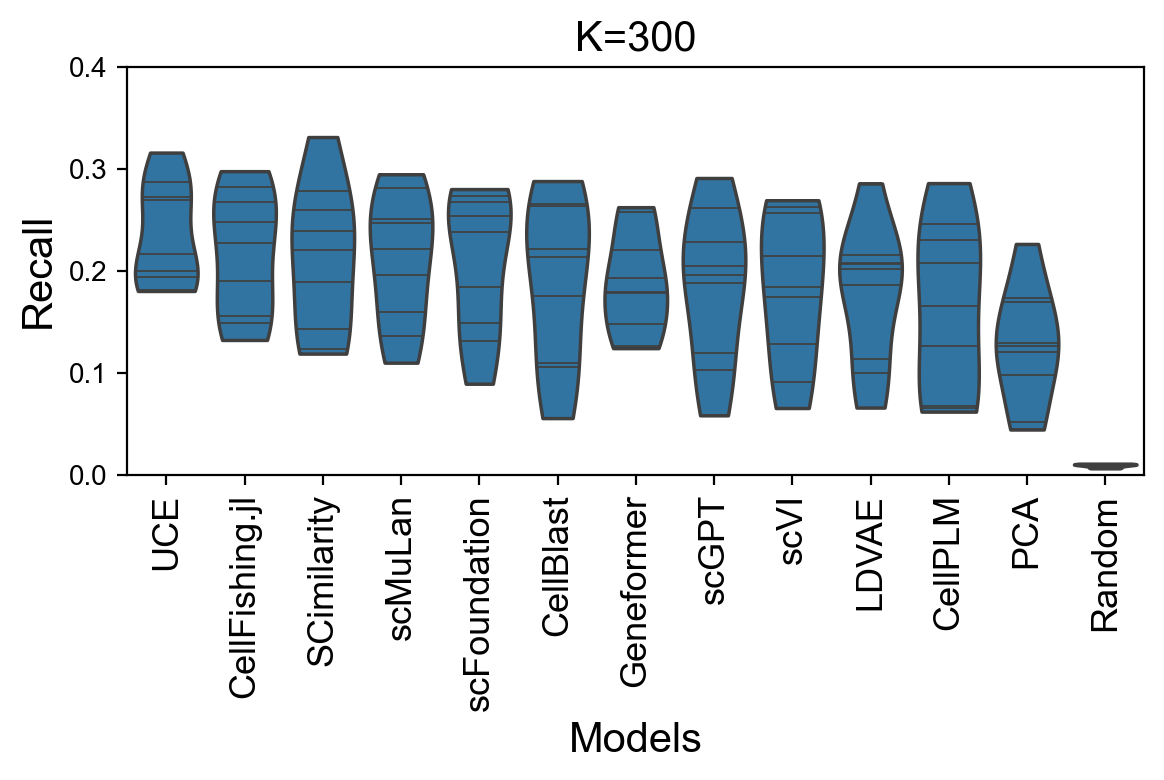

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import scanpy as sc 
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "Arial"

for k in [100,150,200,250,300]:
    result_l = []
    model_l = []
    plat_l = []
    for i in range(1,10):
        df = pd.read_csv(f'/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plot_codes/DEG_analysis_clean/Panel_benchmark_marker_detection_accuracy/detection_vote/{i}_{k}2.csv',index_col=0)
        df_clean = df.replace(-1, np.nan)
        result_l = result_l + df_clean.mean(1).values.tolist()
        model_l = model_l + df.index.tolist()
        plat_l = plat_l + [i]*len(df)
    data_df = pd.DataFrame({'model':model_l,'recall':result_l,'platform':plat_l})
    model_order = data_df.groupby('model')['recall'].mean().sort_values(ascending=False).index.tolist()
    custom_labels = [model_to_name[m] for m in model_order]  
    plt.figure(figsize=(6,4))
    sns.violinplot(
        data=data_df,
        x='model',
        y='recall',
        scale='width',
        order=model_order,
        cut=0,
        inner='stick'
    )

    plt.xticks(
        ticks=range(len(custom_labels)),
        labels=custom_labels,
        rotation=90,
        fontsize=13,
    )
    plt.ylim((0,0.4))
    plt.ylabel("Recall",fontsize=15)
    plt.xlabel("Models",fontsize=15)
    plt.title(f"K={k}",fontsize=15)
    plt.tight_layout()
    # plt.savefig(f'/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/DE_genes/violin_{k}2.pdf',format='pdf')
    plt.show()


In [4]:
import seaborn as sns 
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "Arial"

result_l = []
model_l = []
plat_l = []
k_l = []

for k in [100,150,200,250,300]:
    for i in range(1,10):
        df = pd.read_csv(f'/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plot_codes/DEG_analysis_clean/Panel_benchmark_marker_detection_accuracy/detection_vote/{i}_{k}2.csv',index_col=0)
        result_l = result_l + df.mean(1).values.tolist()
        model_l = model_l + df.index.tolist()
        plat_l = plat_l + [i]*len(df)
        k_l = k_l + [k]*len(df)
data_df = pd.DataFrame({'model':model_l,'recall':result_l,'platform':plat_l,'k':k_l})
    


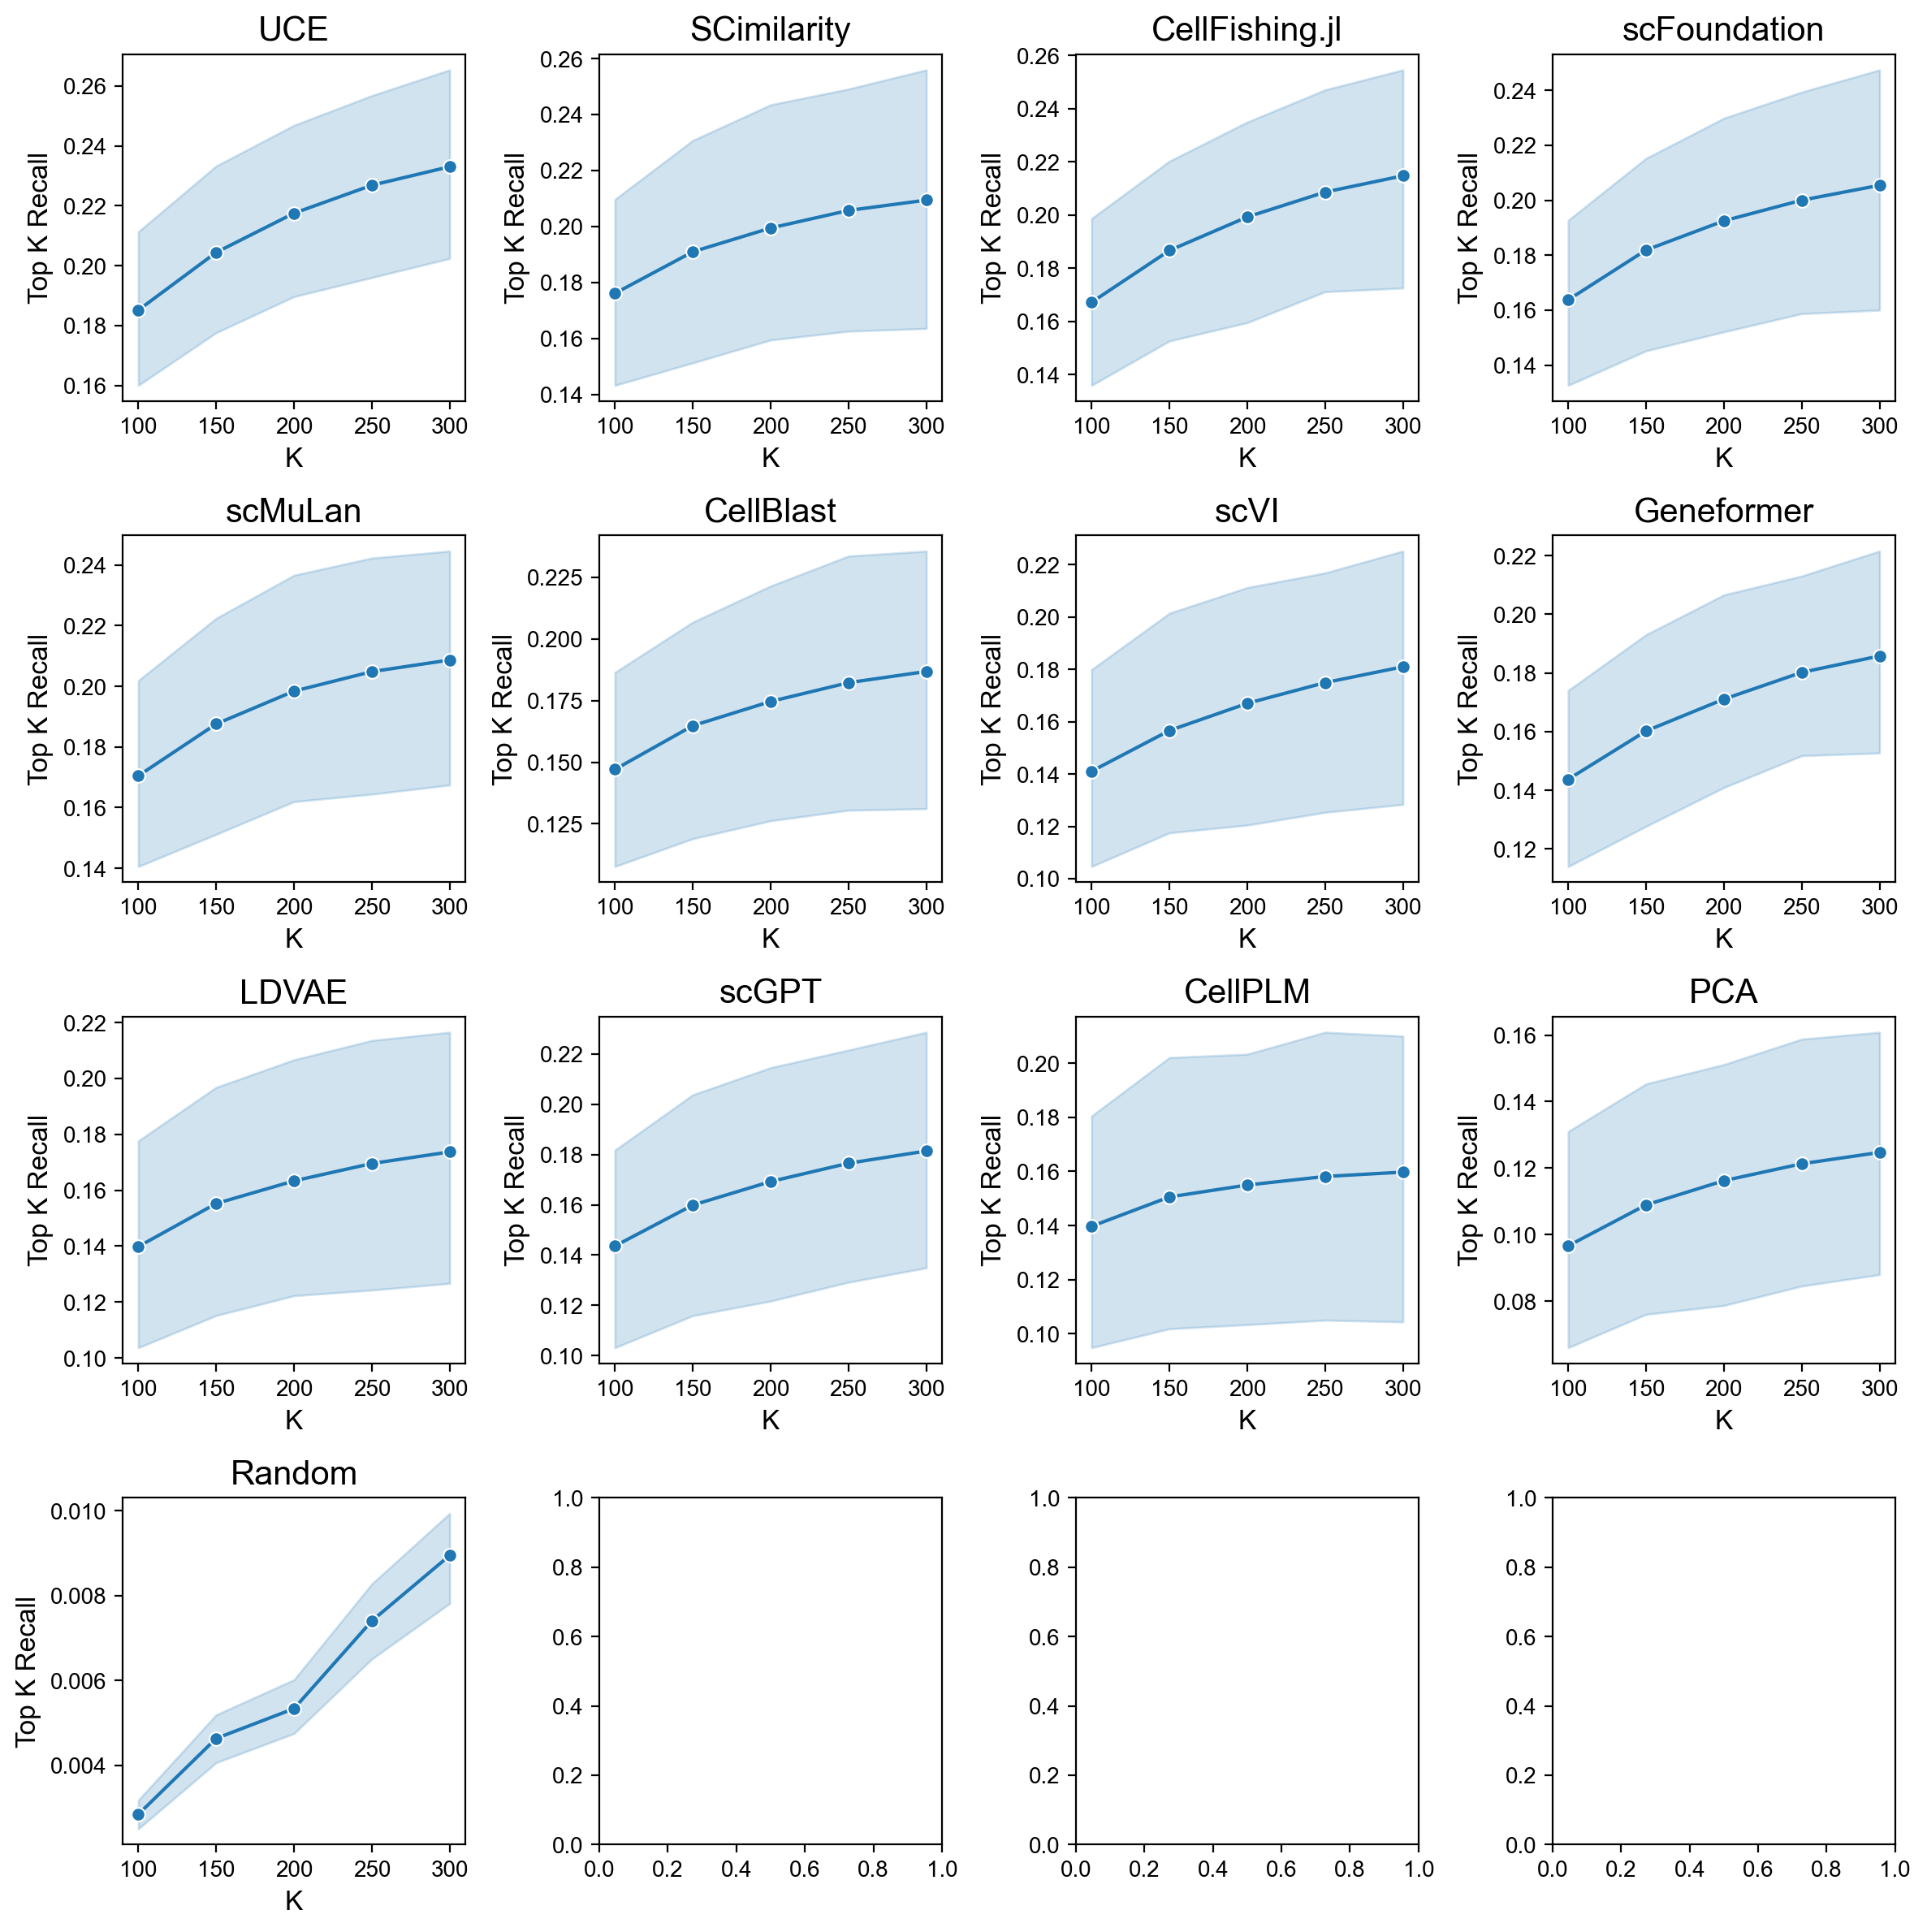

In [5]:
# plt.figure(figsize=(4,4))
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
i=0
for a,b in model_to_name.items():
    ax = axes[int(i/4),int(i%4)]
    sns.lineplot(
        data=data_df[data_df['model']==a],
        x='k',
        y='recall',
        # hue='model',
        # errorbar='sd',
        # err_style='bars',
        marker="o",
        ax=ax,
    )
    ax.set_xlabel('K',fontsize=12)
    ax.set_ylabel('Top K Recall',fontsize=12)
    ax.set_title(b,fontsize=15)
    i+=1
    # if i >=9:
    #     break

plt.tight_layout()
# plt.savefig('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/DE_genes/curve2.pdf',format='pdf')

